<a href="https://colab.research.google.com/github/ggug0125-ui/AI_26/blob/main/05_03_%ED%8A%B8%EB%A6%AC%EC%9D%98_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 지금까지 K-최근접이웃 알고리즘, 선형회귀, 릿지, 라쏘, 다항회귀, 로지스틱회귀
# 등을 배웠고 확률적경사하강법을 이용한 분류와 결정트리 모델까지 학습을 함

# 테스트 세트 말고 검증 세트를 사용하는 cv(교차검증), 하이퍼파라미터튜닝등을 사용
# 코랩에는 왠만한 AI용 라이브러리가 설치 되어 있는데 안되어 있는 것은 수동 설치해라~
!pip install xgboost
!pip install pycaret

In [ ]:
# 앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법
# 정형데이터 : 지금까지 학습한 수치자료가 있는 값
# 비정형데이터 :  데이터베이스나 엑셀로 표현하기 어려운 데이터
#       (택스트 데이터, 디카사진, mp3등) -> 신경망 알고리즘

# 랜덤 포레스트 :  결정 트리를 랜덤하게 만들어 결정트리(나무)숲을 만듬
#          -> 최종 예측

# 1000개의 샘플이 들어 있는 가방에서 100개의 샘플을 뽑을때 1개를 뽑고
# 뽑았던 1개를 다시 가방에 넣음
# 중복된 샘플을 뽑을 수 있음  -> 부트스트랩 샘플이라고함
# 부트스트랩 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링

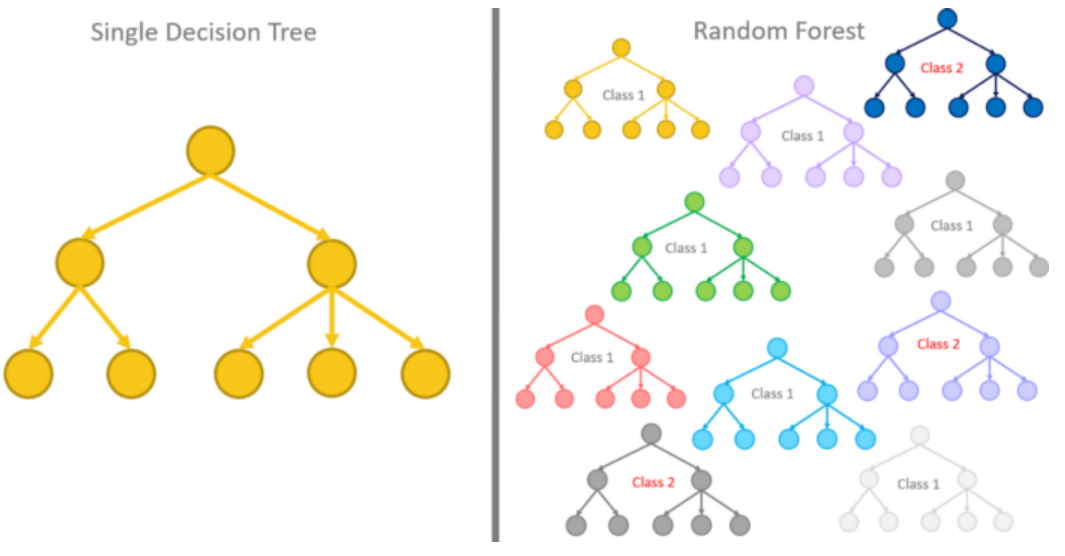

In [ ]:
# 분류 모델인 : PandomforestClassifier는
# 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택한다.
# 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용
# 다만 회귀 모델인 RandomForeatRegressor는 전체 특성을 사용
# 사이킷 런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다.

# 그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여
# 가장 높은 확율을 가진 클래스를 예측으로 삼는다.
# 회귀일 때는 단순히 각 트리의 예측을 평균함
# 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
# 회귀 : 임의의 어떤 숫자를 예측하는 문제


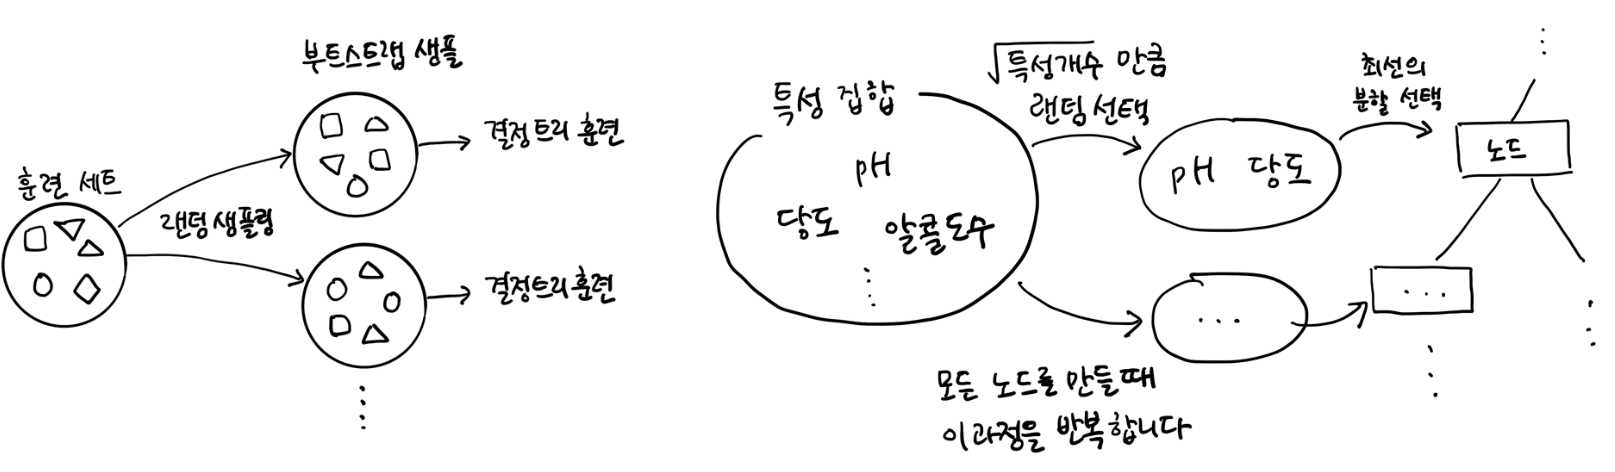

In [4]:
# 와인찾기 데이터

import numpy as np  # 수치 계산과 배열 처리를 위한 numpy 라이브러리 불러오기
import pandas as pd # CSV 파일을 읽고 표 형태 데이터를 다루기 위한 pandas 불러오기
from sklearn.model_selection import train_test_split  # 데이터를 학습용(train)과 테스트용(test)으로 나누는 함수 불러오기

wine = pd.read_csv('https://bit.ly/wine_csv_data')  # 인터넷에 있는 와인 CSV 데이터를 읽어서 wine(DataFrame)에 저장
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
# alcohol, sugar, pH 3개 특성만 선택하여 입력 데이터(X) 생성
# sklearn 모델에서 사용하기 위해 numpy 배열로 변환

target = wine['class'].to_numpy()  # 와인 종류(class)를 정답 데이터(y)로 가져와 numpy 배열로 변환
data   # 입력 데이터(X) 내용 확인 (각 행 = 와인 하나, 각 열 = alcohol/sugar/pH 값)

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [5]:
target

# 정답 데이터(y) 출력
# 각 와인이 어떤 종류(class)인지 저장된 배열
# 보통 0과 1로 구성되어 있으며 (예: 레드/화이트 와인 구분)
# 머신러닝 모델이 맞춰야 하는 정답(label) 역할을 함

array([0., 0., 0., ..., 1., 1., 1.])

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
# 전체 데이터(data, target)를 학습용과 테스트용으로 분리
# train_input  : 모델이 학습할 입력 데이터(X_train)
# test_input   : 모델 성능을 평가할 입력 데이터(X_test)
# train_target : 학습용 정답(y_train)
# test_target  : 테스트용 정답(y_test)
# test_size=0.2 → 전체 데이터의 20%를 테스트 데이터로 사용
# random_state=42 → 실행할 때마다 같은 방식으로 데이터가 나뉘도록 고정

print(train_input.shape, test_input.shape )
# 학습 데이터와 테스트 데이터의 크기 확인
# (데이터 개수, 특성 개수) 형태로 출력됨

(5197, 3) (1300, 3)


In [ ]:
#----------------------------------------  RandomForestClassifier  --------------------------------------

In [8]:
from sklearn.model_selection import cross_validate # 크로스 검증용
# 교차검증을 수행하여 모델 성능을 여러 번 평가하는 함수 불러오기

from sklearn.ensemble import RandomForestClassifier # 100개의 결정 트리 사용
# 여러 개의 결정트리를 만들어 결과를 합치는 앙상블 모델(Random Forest) 불러오기

rf = RandomForestClassifier(n_jobs=-1, random_state=42) # n_jobs=-1 모든 cpu 사용
# 랜덤포레스트 모델 생성
# 기본적으로 여러 개(기본 100개)의 결정트리를 생성하여 학습
# n_jobs=-1 → CPU 코어를 모두 사용하여 병렬 처리 (속도 향상)
# random_state=42 → 실행할 때마다 같은 결과가 나오도록 고정

scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# 랜덤포레스트 모델로 교차검증 수행
# train_input, train_target 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수(train_score)도 함께 저장
# n_jobs=-1 → 교차검증도 병렬 처리로 빠르게 수행
# n_jobs=-1 모든 cpu 사용
# return_train_score=True 검증 점수와 훈련 세트에 대한 점수도 리턴

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold에서 나온 train_score와 test_score의 평균 계산
# train_score 평균 → 학습 데이터 기준 성능
# test_score 평균  → 실제 일반화 성능(더 중요한 지표)
# train_score 과대 적합 0.9973541965122431

0.9973541965122431 0.8905151032797809


In [9]:
# 랜덤 포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함
# 결정 트리의 큰 장점중 하나인 특성 중요를 계산한다.
# 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합 한 것이다.
# 훈련 후에 중요도를 출력 해보자

rf.fit(train_input, train_target) # 훈련 후 특성 중요도 출력
# 랜덤포레스트 모델을 학습 데이터(train_input, train_target)로 훈련
# 여러 개의 결정트리를 생성하고 각각 학습한 뒤 결과를 합쳐 최종 모델 완성

print(rf.feature_importances_)
# 각 입력 특성(alcohol, sugar, pH)이 예측에 얼마나 중요하게 사용됐는지 출력
# 값이 클수록 모델이 해당 특성을 더 중요하게 사용했다는 의미
# 세 값의 합은 1이 되며 상대적인 중요도를 나타냄


[0.23167441 0.50039841 0.26792718]


In [ ]:
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 현재 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

# 알콜도수   , 당도      , pH 비교 해보자.
# 당도의 중요도가 감소하고, 알콜 도수와 pH 중요도가 상승함
# 이유는 랜덤포레스트가 특성 일부를 랜덤하게 선택하여 결정 트리를 훈련함(중복허용)
# 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회가 됨(과대적합을 줄임)

In [10]:
# RandomForestClassifier기능중에 자체적으로 모델을 평가하는 점수를 얻을 수 있다.
# OOB(Out Of Bag)부트스트랩에 포함되지 않고 남은 샘플 -> 결정 트리 평가용(검증 세트로 활용)
# oob_score=True -> 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력(oob_score_)

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
# 랜덤포레스트 모델 생성
# oob_score=True → OOB(Out-Of-Bag) 샘플을 이용해 별도의 검증 점수를 계산
# n_jobs=-1 → CPU 코어 전체 사용하여 병렬 학습
# random_state=42 → 실행할 때마다 같은 결과가 나오도록 고정


rf.fit(train_input, train_target)
# 학습 데이터로 랜덤포레스트 훈련 수행
# 각 결정트리는 부트스트랩 샘플(랜덤 복원추출 데이터)로 학습됨

print(rf.oob_score_)   # 교차 검증 점수와 비슷한 결과를 얻
# OOB 점수 출력
# 각 트리 학습에 사용되지 않은 데이터(OOB 샘플)로 성능을 평가한 값
# 별도의 validation 세트 없이 모델의 일반화 성능을 추정할 수 있음
# OOB 점수를 사용하면 교차 검증을 대신할 수 있어 결과적으로 훈련 세트에 더 많은 샘플을 사용할수 있음

0.8934000384837406


In [ ]:
#----------------------------------------  RandomForestClassifier 끝 --------------------------------------

In [ ]:
#----------------------------------------  ExtraTreesClassifier  ------------------------------------------

In [ ]:
# 엑스트라 트리 : 100개의 결정 트리 훈련 -> 부트스트랩 샘플을 사용하지 않음 (전체 훈련세트 사용)
# 대신 노드를 분할 할때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할함
# 엑스트라 트리의 결정 트리 splitter = 'random'
# 하나의 결정 트리에서 특성을 무작위로 분할한다면 성능이 낮아지겠지만
# 많은 트리를 앙상블 하기 때문에 과대 적합을 막고 검증세트릐 점수를 높이는 효과가 있다.

In [11]:
from sklearn.ensemble import ExtraTreesClassifier # ExtraTreesClassifier 엑스트라 트리
# 랜덤포레스트와 비슷하지만 분할 기준을 더 무작위로 선택하는 앙상블 모델
# 여러 개의 매우 랜덤한 결정트리를 만들어 평균 결과를 사용

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
# 엑스트라 트리 모델 생성
# n_jobs=-1 → CPU 코어 전체 사용 (병렬 처리)
# random_state=42 → 실행할 때마다 동일한 결과 재현

scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
# 엑스트라 트리 모델로 교차검증 수행
# 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 저장
# n_jobs=-1 → 교차검증 병렬 처리

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold의 train_score와 test_score 평균 출력
# train_score → 학습 데이터 기준 성능
# test_score  → 새로운 데이터에 대한 일반화 성능
# RandomForestClassifier와 결과가 비슷함. 대신 속도가 빠름


0.9974503966084433 0.8887848893166506


In [12]:
et.fit(train_input, train_target)
# 엑스트라 트리 모델을 학습 데이터(train_input, train_target)로 훈련
# 여러 개의 무작위성이 큰 결정트리를 생성하고 학습한 뒤 결과를 평균내어 모델 완성

print(et.feature_importances_)
# 각 입력 특성(alcohol, sugar, pH)의 중요도 출력
# 모델이 예측할 때 어떤 특성을 더 많이 사용했는지 나타냄
# 값이 클수록 중요한 특성이며, 전체 중요도의 합은 1이 됨

[0.20183568 0.52242907 0.27573525]


In [ ]:
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 현재 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과
# 특성 중요도를 보면 결정 트리보다 당도에 대한 의존성이 작다.

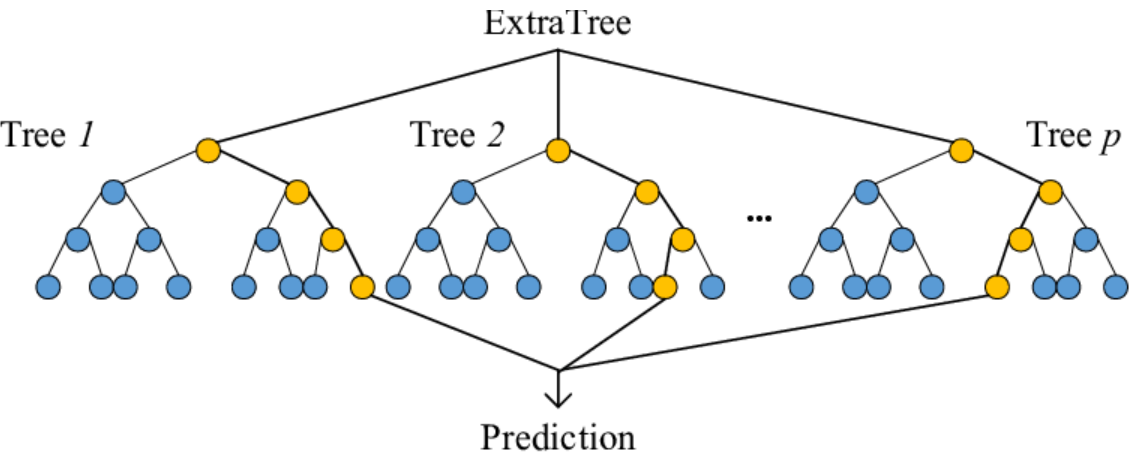

In [ ]:
#----------------------------------------  ExtraTreesClassifier  끝 ------------------------------------------

In [ ]:
#----------------------------------------  GradientBoostingClassifier  ------------------------------------------

In [13]:
# 그레이디언트 부스팅 Gradient Boosting(기울기)
# 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블
# 사이킷런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정 트리를 100개 사용
# 때문에 과대적합에 강하고 일반적인 높은 일반화 성능을 기대함

# gradient는 경사 하강법을 사용하여 트리를 앙상블에 추가함
# 분류 : 로시스틱 손실 함수, 회귀에서는 평균 제곱 오차 함수를 사용
# 경사 하강법 손실 함수를 산으로 정의하고 가장 낮은 곳으로 찾아 내려오는 과정

# 가장 낮은 곳으로 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는 것
# 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동, 손실함수의 낮은 곳으로 천천히 이동
from sklearn.ensemble import GradientBoostingClassifier
#                            GradientBoostingClassifier 그레이언트 부스팅
# 여러 개의 약한 결정트리를 순서대로 학습시키며
# 이전 모델의 오차를 점점 보완해가는 앙상블 모델(Gradient Boosting) 불러오기

gb = GradientBoostingClassifier(random_state=42)
# 그래디언트 부스팅 분류 모델 생성
# 이전 트리가 틀린 데이터를 다음 트리가 집중적으로 학습하는 방식
# random_state=42 → 실행할 때마다 같은 결과가 나오도록 고정

scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs= -1)
# 그래디언트 부스팅 모델로 교차검증 수행
# 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 저장
# n_jobs=-1 → 가능한 CPU 코어를 사용해 병렬 평가 수행

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold에서 나온 train_score와 test_score의 평균 계산
# train_score → 학습 데이터 기준 성능
# test_score  → 새로운 데이터에 대한 실제 일반화 성능

# 과대 적합 해결 0.8881086892152563 0.8720430147331015

0.8881086892152563 0.8720430147331015


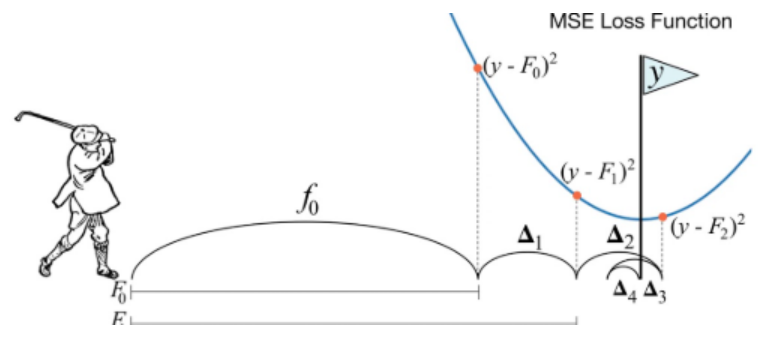

In [14]:
gb = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.2, random_state= 42)
# 그래디언트 부스팅 모델 생성
# n_estimators=500 → 결정트리(약한 학습기)를 500개 순차적으로 생성하여 학습
# learning_rate=0.2 → 각 트리가 반영되는 학습 비율(보정 강도)
# 값이 크면 빠르게 학습하지만 과대적합 위험 증가
# random_state=42 → 실행할 때마다 동일한 결과 재현

scores = cross_validate(gb, train_input, train_target, return_train_score= True, n_jobs= -1)
# 그래디언트 부스팅 모델로 교차검증 수행
# 여러 fold로 데이터를 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 저장
# n_jobs=-1 → CPU 코어 전체 사용하여 병렬 처리

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold의 train_score와 test_score 평균 출력
# train_score → 학습 데이터 기준 성능 (과대적합 여부 확인 가능)
# test_score  → 실제 예측 성능(일반화 성능)

# 94.64% 87.80% 훈련과, 검증 점수차이가 10%이상 나지 않으면 괜찮음(과대적합 아님)

0.9464595437171814 0.8780082549788999


In [15]:
gb.fit(train_input, train_target)  # 훈련시작
# 그래디언트 부스팅 모델을 학습 데이터(train_input, train_target)로 훈련
# 여러 개의 결정트리를 순차적으로 학습시키며 이전 모델의 오차를 점점 보완

print(gb.feature_importances_)    # 당도에 의존도가 낮음
# 각 입력 특성(alcohol, sugar, pH)의 중요도 출력
# 모델이 예측할 때 어떤 특성을 더 많이 사용했는지 나타냄
# 값이 클수록 예측에 더 큰 영향을 준 특성이며, 전체 합은 1이 됨

# 그레이디언트 부스팅이 랜덤포레스트보다 조금 더 높은 성능이 있다.
# 하지만 순서대로 트리를 추가하기 때문에 훈련속도가 좀 느리다.
# GradientBoostingClassifier에는 n_jobs=-1 매개값이 없다.(구형모델이라)

[0.15887763 0.6799705  0.16115187]


In [ ]:
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 현재 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

In [ ]:
#----------------------------------------  GradientBoostingClassifier  끝 ------------------------------------------

In [ ]:
#----------------------------------------  HistGradientBoostingClassifier  ------------------------------------------

In [17]:
# 히스토리그램 기반 그레이언트 부스팅 HistGradient : 그레디언트 부스팅의 개선버전
# 입력 특성을 256 구간으로 나눔 -> 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.
# 특히 256구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용함
# HistGradientBoostingClassifier 는 기본 매개변수에서 안정적인 성능을 얻을 수있다
# HistGradientBoostingClassifier 에는 트리의 개수를 지정하는데
# n_estimators 대신 max_iter를 사용함(성능 항상용)

# from sklearn.experimental import enable_hist_gradient_boosting 아직 개발중

from sklearn.ensemble import HistGradientBoostingClassifier # 분류용
# Histogram 기반 Gradient Boosting 분류 모델 불러오기
# 데이터를 구간(bin)으로 나누어 학습하기 때문에 속도가 빠르고 과대적합이 비교적 적음


hgb = HistGradientBoostingClassifier(random_state= 42)
# 히스토그램 그래디언트 부스팅 모델 생성
# 일반 GradientBoosting보다 효율적이며 대용량 데이터에 강함
# random_state=42 → 실행할 때마다 동일한 결과 재현

scores = cross_validate(hgb, train_input, train_target, return_train_score= True, n_jobs= -1)
# 히스토그램 그래디언트 부스팅 모델로 교차검증 수행
# 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 확인
# n_jobs=-1 → CPU 코어 전체 사용


print(np.mean(scores['train_score']), np.mean(scores['test_score']))  # 과대 적합 억제 성공
# 각 fold의 train_score와 test_score 평균 출력
# train/test 점수 차이가 줄어들면 과대적합이 감소했다는 의미
# GradientBoosting보다 일반화 성능이 더 안정적인 경우가 많음


0.9321723946453317 0.8801241948619236


In [18]:
from sklearn.inspection import permutation_importance
# permutation_importance 특성 중요도 확인
# : 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화되는지 관찰

hgb.fit(train_input, train_target)  # 히스토그램기반의 훈련을 진행 -> 훈련세트에서 특성 중요도를 계산해보자.
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
# permutation importance 계산 수행
# 각 특성을 하나씩 무작위로 섞어가며 모델 성능 변화 측정
# n_repeats=10 → 중요도 계산을 10번 반복하여 평균값 사용 (안정성 증가)
# random_state=42 → 결과 재현 가능하도록 고정
# n_jobs=-1 → CPU 전체 사용하여 병렬 계산

print(result.importances_mean)
# 각 특성(alcohol, sugar, pH)의 평균 중요도 출력
# 값이 클수록 해당 특성을 섞었을 때 성능이 많이 떨어졌다는 의미
# → 모델 예측에 더 중요한 특성이라는 뜻

[0.08876275 0.23438522 0.08027708]


In [ ]:
# 알콜도수   , 당도    , pH          비교 해보자.
# [0.08876275 0.23438522 0.08027708] 히스토그램 현재결과
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 이전 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

In [19]:
# 이번에는 테스트 세트에 결과를 확인 해보자.
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
# 알콜도수   , 당도    , pH          비교 해보자.
# [0.05969231 0.20238462 0.049     ] 히스토그램 테스트 세트에서 현재 결과
# [0.08876275 0.23438522 0.08027708] 히스토그램 훈련 세트 이전결과
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 이전 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

# HistGradientBoostingRegressor 히스토그램 기반 그레이디언트 부스팅의 회귀 버전

In [ ]:
#----------------------------------------  HistGradientBoostingClassifier 끝  ------------------------------------------

In [20]:
# 사이킷런 말고도 그레이디언트 부스팅 알고리즘을 구현한 라이브러리가 다수 존재
# XGBoost 대표적임 -> 크로스검증이 가능(cross_validate())

from xgboost import XGBClassifier
# XGBoost 라이브러리의 분류 모델 불러오기
# Gradient Boosting을 개선한 고성능 앙상블 모델 (실무에서 매우 많이 사용)

# tree_method='hist' 히스토그램 기반 그레이디언트 부스팅용
# 만약 안되면 파이썬에 설치가 안된것임
# !pip install xgboost
# !pip install pycaret -> 세션 다시 시작하고 위에서부터 다시 객체 생성함

xgb = XGBClassifier(tree_method = 'hist', random_state=42)
# XGBoost 분류 모델 생성
# tree_method='hist' → 히스토그램 기반 트리 생성 방식 사용 (속도 빠름, 메모리 효율적)
# random_state=42 → 실행할 때마다 동일한 결과 재현

scores = cross_validate(xgb,train_input, train_target, return_train_score= True, n_jobs= -1)
# XGBoost 모델로 교차검증 수행
# 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 확인
# n_jobs=-1 → CPU 코어 전체 사용하여 병렬 평가


print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold에서 나온 train_score와 test_score 평균 출력
# train_score → 학습 데이터 기준 성능
# test_score  → 새로운 데이터에 대한 실제 일반화 성능

# 95.58% , 87.82% 와인 교차 검증 점수

0.9567059184812372 0.8783915747390243


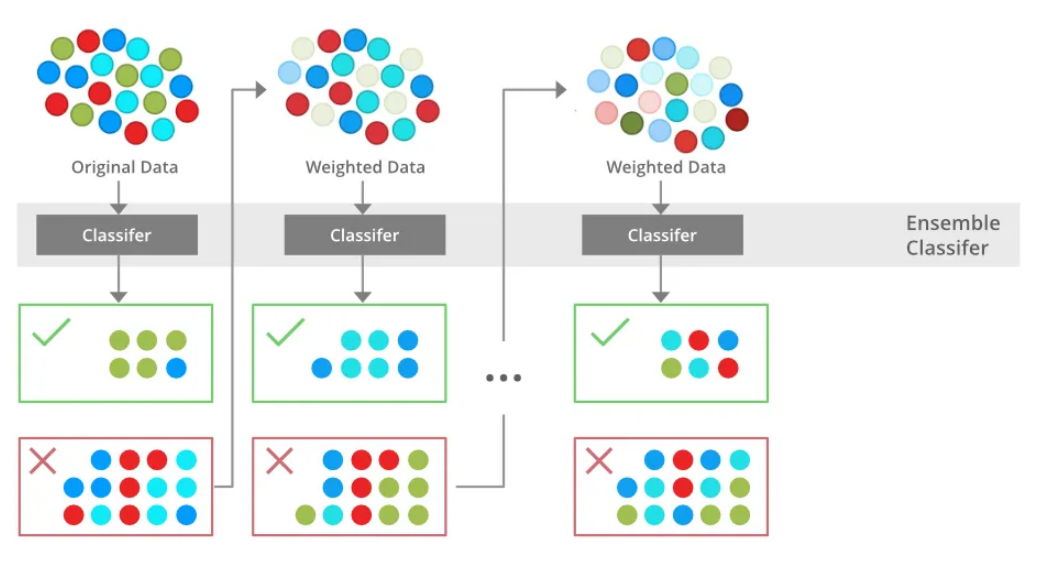

In [21]:
# LGBMClassifier ms에서 만든 LightGBM^2

from lightgbm import LGBMClassifier
# LightGBM 라이브러리의 분류 모델 불러오기
# Gradient Boosting 기반 앙상블 모델로 속도가 매우 빠르고 성능이 좋은 모델

lgb = LGBMClassifier(random_state=42)
# LightGBM 분류 모델 생성
# 리프 중심(leaf-wise) 트리 성장 방식 사용 → 빠른 학습과 높은 성능
# random_state=42 → 실행할 때마다 동일한 결과 재현

scores = cross_validate(lgb, train_input, train_target, return_train_score= True, n_jobs= -1)
# LightGBM 모델로 교차검증 수행
# 데이터를 여러 fold로 나누어 반복 학습 및 평가
# return_train_score=True → 학습 데이터 점수도 함께 확인
# n_jobs=-1 → CPU 코어 전체 사용하여 병렬 처리

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 각 fold에서 나온 train_score와 test_score 평균 출력
# train_score → 학습 데이터 기준 성능
# test_score  → 실제 새로운 데이터에 대한 일반화 성능


0.935828414851749 0.8801251203079884


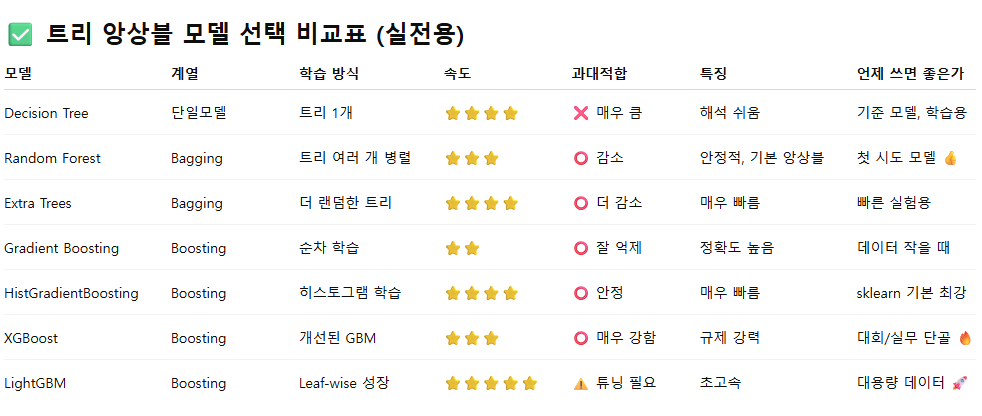